# Machine Learning : Neural Network Exercise

<mark>CIFAR-10 Data Base Multi Classification</mark>

<mark>Mount Google Cloud Drive to process Data

## Introduction
In this exercise, you will implement the backpropagation algorithm for neural networks and apply it to the task of the CIFAR-10 dataset, which is an image classification dataset consisting of ```60000 32x32-pixel color images``` from ```10 categories```, with 50000 for training and 10000 for testing.


## 1. Data loading and visualization

Loaded the CIFAR-10 dataset by using unpickle, each of the batch files contains a dictionary with the following elements:

- data -- a ```10000x3072``` numpy array of uint8s. Each row of the array stores a 32x32 colour image. ```The first 1024``` entries contain the red channel values, ```the next 1024``` the green, and ```the final 1024``` the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
-
- labels -- a list of 10000 numbers in the range ```0-9```. The number at index i indicates the label of the ith image in the array data.

## Mount Google Cloud Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`pay attention to the Data Input X's format: (50000, 3072)`

**Then, we know that the data's images are not split into three channels type (original basic image's shape: channels-height-width)**

In [4]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib, os, pickle
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

## Unpickle function for CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## Load CIFAR-10 data, including training and testing.

# local path
# data_dir = "./cifar-10-batches-py/"

# google cloud drive path
data_dir = "/content/drive/MyDrive/cifar-10-batches-py"

Xs=[]
ys=[]
for i in range(1,6):
    batch_path = os.path.join(data_dir, f'data_batch_{i}')
    input_dict = unpickle(batch_path)
    data_dict_decoded = {k.decode('utf8'): v for k, v in input_dict.items()}
    X = data_dict_decoded['data']
    y = data_dict_decoded['labels']
    Xs.append(X)
    ys.append(y)

X_train = np.concatenate(Xs)
y_train = np.concatenate(ys)

print(f"Check the shape of training data: X: {X_train.shape}, y: {y_train.shape}")

## Load test-dataset file
X_test = []
y_test = []
batch_path = os.path.join(data_dir, f'test_batch')
data_dict = unpickle(batch_path)
X_test = data_dict[b'data']
y_test = data_dict[b'labels']

Check the shape of training data: X: (50000, 3072), y: (50000,)


<mark>(1) Data Input Shape: (50000, 3072): the first dimension is img's counts</mark>

<mark>(2) the image's original default (channel-height-width)</mark>


> key points to deal with 'un-split image shape: transform (1, 3072) -> (1, 32, 32, 3)'

> it's a four dimension processed shape

- Note: (about the shape transformation of photos)
  - The original (most common) shape format of IMG is **(channels-height-width)**, so the <mark>first reshape<mark> should be <mark>single_img.reshape(3, height, width)<mark>
    - <mark>Reason<mark>:
      - setting a counter example at first, for it's all-dimension multipy result, then as long as its 32, 32, 3 these three number, then don't need to take their relative positions into account, then it can reshape successfully. but think about that: <mark>yet the each certain channel's corresponding picture (single color, one-channel graph) counts a lot, it must gurantee the certain image's array is on its correct dimension position. (so, channel-first for original format)<mark>

    - otherwise, if directly reshape (32, 32, 3): it becomes that: a img has 32 channels, and each channel has (32*3) shape of sub-img

    - (3, 32, 32), **linking with the dimension shape of high-dim array, the last two dimension is the matrix's shape (_, matrix_height, matrix_width)**

  - then, using transform (1, 2, 0)


<mark>(3) image's scling **Origianl_pixels / 255**

- Explanation: Why not change the IMG presentation?
not change the original presentation. **Image rendering** is based on the **relative differences** and brightness **relationships** of pixel values, **not just absolute pixel values**.
Regardless of whether the pixel values are 0-255 or 0-1, the color and brightness of the image are based on relative proportions.

- Explanation: Why Doing so?
Image processing in deep learning: In many deep learning frameworks, **image data usually needs to be normalized to [0, 1]**. This is because the **activation functions** in neural networks (such as Sigmoid or ReLU) usually **expect input** values ​​to be **within a standardized range** to avoid gradient explosion or gradient vanishing problems.

Image data preprocessing: Normalizing data to [0, 1] or other ranges helps **speed up (avoid gradient explosion or gradient vanishing)** the training process and improve the training efficiency of the model

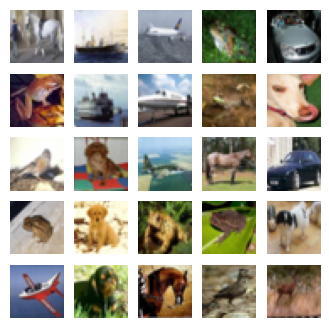

In [5]:
def plot_sample_image(X, num_samples):
    """ sample images and show them
    assume the image is square"""
    sample_ids = np.random.choice(X.shape[0], num_samples, replace=False)
    sampled_X = X[sample_ids]

    n = int(np.sqrt(num_samples))
    fig, ax_array = plt.subplots(nrows=n, ncols=n, sharey=True, sharex=True, figsize=(4, 4))
    for i, ax in enumerate(ax_array.flat):
        if i < len(sampled_X):
            img = sampled_X[i].reshape(3, 32, 32).transpose([1, 2, 0])
            ax.imshow(img/255)
            ax.axis('off')

plot_sample_image(X_train, 25)
plt.show()

### <span style="color:red"> TO-DO (10')⬇︎</span>
<span style="color:red">

- Following the plot_sample_image() function, please define a plot_single_image() function that take one input vector ```x.shape(): (3072,)```, and display the ```32X32``` image.

- Add inline comments to your code to explain why you reshape like that.

</span>


In [6]:
# print(f'X_train shape: {X_train.shape}')
# print(f'X_test shape: {X_test.shape}')

# # 32 * 32 * 3
aaaa = np.random.choice(X_train.shape[0])
aaaa
# choose an IMG
# X_train[1].reshape(3, 32, 32)

36174

In [7]:
# the X data is original shape: X: (50000, 3072), it combined the original IMG dimension of height & width tohether (multipy them together!)

# so, when X: (50000, 3072) the first dimension is 50000, we randomly pick one as the index to be the No. of IMG, then reshape the image shape to be (channels, height, width)

In [8]:
X_train[762].shape

(3072,)

`original data format` of the image. The original data is arranged in the order of `(channels, rows, columns)`

Original IMG Shape: (3072,)
Reshape IMG Shape: (32, 32, 3)


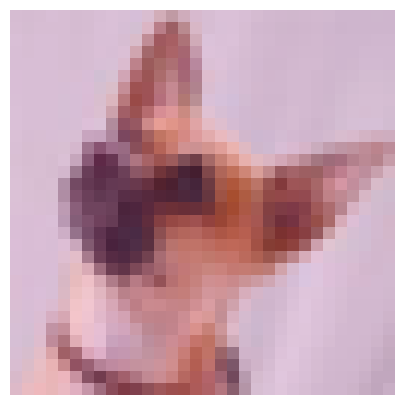

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_single_image(x):
    ## Your code goes here ...
    ## Donnot forget to add inline comments ...

    fig, ax = plt.subplots(1, 1, sharey=False, sharex=False, figsize=(5, 5))

    for i, ax in enumerate([ax]):  # Single ax since it's 1 image
        if i < len(x):
            print(f'Original IMG Shape: {x.shape}')
            # reshape first then transpose (cuz the img is channles-first as an img for each corresponding channel)
            img = x.reshape(3, 32, 32).transpose([1, 2, 0])  # Reshaping and transposing
            print(f'Reshape IMG Shape: {img.shape}')
            ax.imshow(img/225)  # Normalizing pixel values (dont change the relative difference of image pixels' relation)
            ax.axis('off')  # Turn off the axis

# Use your defined function to plot the No.762 image
# different from the original multi sample plotting presentation, this is setting a certain NO of IMG
plot_single_image(X_train[762])
plt.show()

Labels in CIFAR-10 are integers from 0 to 9, representing 10 different classes:
- 0: airplane,
- 1: automobile,
- 2: bird,
- 3: cat,
- 4: deer,
- 5: dog,
- 6: frog,
- 7: horse,
- 8: ship,
- 9: truck.

For the purpose of training a neural network, we need to recode the labels into a vector where all elements are 0 except for the index corresponding to the class, which is 1. This is ```One-hot Encoding``` transform.

Given that CIFAR-10 has 10 classes, if you have ```a label 3```, its one-hot encoded representation would be ```[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

- label 0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- label 1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- label 2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
- label 3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
- label 4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
- label 5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
- label 6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
- label 7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
- label 8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
- label 9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

## <mark>Labels Encoding<mark>

- length: len(labels) => the length of binary encoding array
- for the label categorical is **discret**, and most of them **dont have a relative order (so directly encoding is not effective, like 1, 2, 3, .... N_labels)**

- for multi classification tasks, <mark>softmax()<mark>, we know that **the output dimension of hidden layer is (xxx, n_labels), <<< output dim: n_labels**, so we receive the same dimension as the label counts and then using **softmax to transform into prob**. (in short: what softmax receive is the same dimension as output labels' counts)

- using **softmax & One-hot Encoding**: can better compute **Cross-Entropy Loss**

Dive into the formula to make sense 'Why Softmax + One-Hot Encoding is good-pair?'

  - $$Cross Entropy Loss = -\sum_{i=1}^{N} y_i \cdot \log(p_i)$$
    - suppose we have three labels classfication: **[0, 1, 0]**
    - then after Model's computation, forward propagation, softmax activation, then we get **[0.2, 0.7, 0.1]**
    - computed Cross Entropy Loss: <mark>|key points for simple computation|: (One-Hot Encoding has 0 for non-target)<mark>, so it can just directly compute:
    - $$Loss = -(y_A \cdot \log(p_A) + y_B \cdot \log(p_B) + y_C \cdot \log(p_C))$$

    - $$Loss= -(y_B \cdot \log(p_B)) $$

  <mark>Good Design on 'LOSS' & 'One-Hot Encoding'<mark>
    - **Good Design: why this (1) 0 in One-Hot Encoding (2) Cross Entropy design for log(x) & y_i * log(x)**
      - (1) **only remaining** the correct result added into the loss, make the correct answer **maximize its probability.**
      - (2) **using log(x)**: make the punishment for no-maximize correct answer situation.
      - (3) to sum up: it try to maximize the probability for correct answer.
    

<mark>Additional Material For One-Hot Encoding<mark>
1. for classification, it's not only has one target column for classfication target.

- Col1 / Col2
- [Tank][GouTi]
- [Tank][Ground]
- [DPS] [GouC]
- [DPS] [Ground]
- [DPS] [long-dist]
- [Spt] [func]

-> for the above, we have two columns together to define a complete label type.

so, we need to (1) **combine them as a whole single column**, like [Tank_Gouti] **(total labels: col1_total * col2_total)**

```python
# encoder for multi-col classification combination
# obj
enc = OneHotEncoder(handle_unknown='ignore')
enc
<<< OneHotEncoder(handle_unknown='ignore')


X = [['Male', 1], ['Female', 3], ['Female', 2]]
>>> enc.fit(X)


>>> enc.categories_
<<< [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]


>>> enc.transform([['Female', 1], ['Male', 4]]).toarray()
<<< array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])


>>> enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])
<<< array([['Male', 1],
       [None, 2]], dtype=object)
```





### <span style="color:red"> TO-DO (5')⬇︎</span>
<span style="color:red">

- Finish the code below to implement "one-hot" encoding of y (using import package OneHotEncoder).
- Get the answer of ```print```
</span>

In [10]:
print(f'y_train.shape: {y_train.shape}')
print(set(y_train))
y_train

y_train.shape: (50000,)
{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


array([6, 9, 9, ..., 9, 1, 1])

In [11]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder Object
encoder = OneHotEncoder(sparse_output=False)

## Complete your one-hot encoding
y_train_reshape = y_train.reshape(50000, 1)
y_onehot = encoder.fit_transform(y_train_reshape)

## Get the print answer ...
print(f"Your one-hot shape: {y_onehot.shape}, \nCheck if you get the correct format of y: \n{y_train[1], y_onehot[1,:]}")

# y_onehot
# y_train

Your one-hot shape: (50000, 10), 
Check if you get the correct format of y: 
(np.int64(9), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))


### <span style="color:red"> TO-DO (5')⬇︎</span>
<span style="color:red">

- Normalizing the pixel values of input `X_train` and `X_test` to a range of 0 to 1 by using `Z-Score` normalization.

</span>

In [12]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'X_train.type: {type(X_train)}')

X_train.shape: (50000, 3072)
X_test.shape: (10000, 3072)
X_train.type: <class 'numpy.ndarray'>


In [13]:
# we only normalize on X data, not on y target

<mark>scaling (using (x-mean) / std) + normalization<mark>

In [14]:
## Your normalization here
## ???
def norm(X):
    one_dim_X = X.reshape(1, -1)

    # mean
    u = np.mean(one_dim_X)

    # std
    std = np.std(one_dim_X)

    norm_X = (X - u) / std

    return norm_X

X_train = norm(X_train)
X_test = norm(X_test)

# X_train[1].shape
print(X_train[1])
print(X_test[1])

[ 0.51897733  0.08250084 -0.24485653 ...  0.28515064  0.33191597
  0.36309287]
[1.77129452 1.708854   1.72446413 ... 0.88151717 1.08444885 1.20932988]


## 2. Model Representation

Our neural network is shown in Figure below. It has 3 layers:
- an input layer,
- a hidden layer,
- an output layer.

Recall that our inputs are pixel values of digit images. Since the images are of size  `3 x 32 x 32`, this gives us `3072` input layer units (not counting the extra bias unit which always outputs 1). The hidden layer has `512 units`. And the output layer has `10 unit` (corresponding to the 10 digit classes).
<!-- ![nn_model](./mlp.png) -->
<!-- from IPython.display import Image, display
display(Image(filename='./mlp.png', width=300)) -->
![image-2.png](attachment:image-2.png)

Initializing the neural network with the shpaes of the following:

In [15]:
input_size = 3072
hidden_size = 256
num_labels = 10

### 2.1 Define activation function

In neural networks, the choice of activation function depends on the task and the layer’s role. For multi-class classification tasks where classes are mutually exclusive, you need to choose an activation function that is suitable for multi-label classification, not binary classification.

The sigmoid function is defined as：
 $$ g\left( z \right)=\frac{1}{1+{{e}^{-z}}}. $$

The softmax function is defined as:
 $$ \text{softmax}(z_{i}) = \frac{e^{z_{i}}}{\sum_{j}e^{z_j}}.$$

The ReLU (Rectified Linear Unit) function is defined as:
 $$ \text{ReLU}(z) = \max (0,z).$$

Each activation function is chosen based on its mathematical properties and how it influences learning dynamics and model performance.

Among the options, one activation function is employed for the `hidden layers`, another is utilized for `binary classification` tasks, and the other is applied in `multi-label classification` scenarios.

### <span style="color:red"> TO-DO (10')⬇︎</span>
<span style="color:red">

- Choose the right activation functions, and define them corresponding.
</span>


In [16]:
## Please implement the activations function below
def YourChoosenActivation_1(z):
    ## Define your choosen activation ...
    # ReLU activation function
    return np.maximum(0, z)

## Maybe you have to define the 2-nd activation function, define here ...
def YourChoosenActivation_2(z):
    # Softmax activation function
    # num_labels = 10
    # so its input is 10
    ## Define your choosen activation ...
    # for it's a multi-classificati task
    # it need softmax
    # single_e_i = np.exp(z)
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

### 2.2 Feedforward

We need to complete the feed-forward calculation of the network's output according to the network model. The output of each unit is given by the activation that you choose.

Note that for the input and hidden layers, we must append a '1' to the original vector to serve as the bias term.

### <span style="color:red"> TO-DO (10')⬇︎</span>
<span style="color:red">

- Define the feed forward calculation function below.
- Identify the sizes of the paramters `theta1` and `theta2`.
</span>

<mark>Note<mark>
add bias term, the bias in **input layer & hidden layer** are different!

In [17]:
## Forward Propagation
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    ## Add bias term to input
    # just for the input layer (not in hidden layer, only works for Input Layers)
    # insert as a new column (a new bias column)
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)

    # shape: (m, input_size + 1) * theta1 shape
    z2 = a1 @ theta1.T
    # ReLU
    a2 = YourChoosenActivation_1(z2)

    # Add bias to hidden layer
    a2 = np.insert(a2, 0, values=np.ones(m), axis=1)
    z3 = a2 @ theta2.T

    # softmax (output 10 prob-like results)
    h = YourChoosenActivation_2(z3)
    return a1, z2, a2, z3, h

### 2.3 Cost funciton

Recall that the cost function for the neural network (with regularization) is given by:

Loss Function -> Cross Entropy

-+-

**The most basic formula:**
$$loss = -y_k \log(h_k)$$

-+-

**Single Sample's total classes:**
$$\sum_{class=1}^{N_{class}}loss = -y_k \log(h_k)$$

-+-

**Batch Samples' total classes**
$$\sum_{sample.No1}^{Batch Size} \sum_{class=1}^{N_{class}} y_k^{(i)} log(h_k^{i})$$

-+-

**Batch Average Sample Loss**
$$-\frac{1}{m} \sum_{sample.No1}^{Batch Size} \sum_{class=1}^{N_{class}} y_k^{(i)} log(h_k^{i})$$


-+-

**Regulated Batch Average Sample Loss**
$$
J(\theta)= -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log \left( h_k^{(i)} \right) + \frac{\lambda}{2m}\left(\sum_{j=1}^{n_1} \sum_{l=1}^{d_1} \theta_{1,jl}^2 + \sum_{j=1}^{n_2} \sum_{l=1}^{d_2} \theta_{2,jl}^2\right)
,$$

where the simplifies loss is $ -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log \left( h_k^{(i)} \right)$, regularization part is $ \frac{\lambda}{2m}\left(\sum_{j=1}^{n_1} \sum_{l=1}^{d_1} \theta_{1,jl}^2 + \sum_{j=1}^{n_2} \sum_{l=1}^{d_2} \theta_{2,jl}^2\right)$. Just so you know, you should not be regularizing the terms that correspond to the bias. For the matrices theta1 and theta2, this corresponds to the first column of each matrix. You should now add regularization to your cost function. Notice that you can first compute the unregularized cost function $J$  and then add the cost for the regularization terms.

You should implement the feedforward computation to compute $h_\theta\left(x^{(i)}\right)$ for every example $i$ and sum the cost over all examples.

Your code should be flexible enough to handle datasets of any size, with any number of labels (you can assume that there are always at least $K ≥ 3$ labels).

Now that you have implemented the cost function, before we proceed to the next steps, it's important to verify the correctness of your implementation.

### <span style="color:red"> TO-DO (20')⬇︎</span>
<span style="color:red">

- Implement the cost function below.
- Add `comments` in line to explain why and how you add regularization to your cost function.
</span>

In [18]:
## Cost Function
def cost(theta1, theta2, X, y, lambda_reg=1):
    m = X.shape[0]
    num_labels = theta2.shape[0]

    # need the last output's softmax array results
    _, _, _, _, h = forward_propagate(X, theta1, theta2)  # perform forward propagation

    # avoid log(0)
    epsilon=1e-10
    h = np.clip(h, epsilon, 1 - epsilon)

    # cross entropy
    # y shape: (50000, 10) => .T => (10, 50000)
    # h: output's softmax result
    # add log to make greater effect of punishment
    term1 = np.sum(y * np.log(h))
    term2 = np.sum((1 - y) * np.log(1 - h))

    J = -(1 / m) * (term1 + term2)

    # Regularization term (excluding bias)
    reg_term = (lambda_reg / (2 * m)) * (np.sum(np.square(theta1[:, 1:])) + np.sum(np.square(theta2[:, 1:])))

    J += reg_term
    return J

## 3. Backpropagation
Now, you will implement the backpropagation algorithm.

*Recall that the intuition behind the backpropagation algorithm is as follows:*

Given a training example $(x^{(t)}, y^{(t)})$, we will first run a "forward pass" to compute all the activations throughout the network, including the output value of the hypothesis $h_\Theta(x)$. Then, for each node $j$ in layer $l$, we compute an "error term" $\delta^{(l)}_j$ that measures how much that node was "responsible" for any errors in our output.

- 1. *For an output node,* we can directly measure the difference between the network’s activation and the true target value, and use that to define $\delta^{(3)}_j$ ​
  (assuming layer 3 is the output layer).
- 2. *For hidden units,* you will compute $\delta^{(l)}_j$ based on a weighted average of the error terms of the nodes in layer $(l + 1)$.


In detail, here is the backpropagation algorithm depicted below. You should implement steps 1 to 4 in a loop that processes one example at a time. Specifically, implement a for-loop for $t = 1:m$ and place steps 1-4 inside the for-loop, with the $t_{th}$iteration performing the calculation on the $t_{th}$ training example $(x^{(t)}, y^{(t)})$. Step 5 will divide the accumulated gradients by
$m$ to obtain the gradients for the neural network.

![image.png](attachment:image.png)

First, let's implment the derivitive function of our $h_\Theta(x)$, i.e. the derivitive of the sigmoid function

### <span style="color:red"> TO-DO (5')⬇︎</span>
<span style="color:red">

- Implement the derivitive of sigmoid function.
</span>

In [19]:
## implement the derivitive of your activation functions below
def YourChoosenActivation_1_gradient(x):
    ## Your code here
    return 0 if x <= 0 else 1

def YourChoosenActivation_2_derivative(z):
    ## Your code here
    m = z.shape[0]

    num_labels = 10

    jacobian = np.zeros((m, num_labels, num_labels))

    for i in range(m):
        for j in range(num_labels):
            for k in range(num_labels):
                if j == k:
                    jaconbian[i, j, k] = z[i, j] * (1 - h[i, j])

                else:
                    jaconbian[i, j, k] = -z[i, j] * h[i, k]

    return jaconbian

### 3.1 Steps to implement backprop algorithm (unregularized)
For each data samle $(x^{(t)}, y^{(t)})$ in the dataset $((x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}),..., (x^{(m)}, y^{(m)}))$, put the following steps in a for-loop from $t=1:m$:

1. Set the input layer’s values $(a^{(1)})$ to the $t^{th}$ training example $x^{(t)}$.
Perform a feedforward pass, computing the activations $(z^{(2)}, a^{(2)}, z^{(3)}, a^{(3)})$
for layers 2 and 3. Note that you need to add a +1 term to ensure that the vectors of activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias unit.

2. For each output unit $k$ in layer 3 (the output layer), set $\delta^{(3)}_k = (a^{(3)}_k-y_k)$ (think about why by following the equations given in the lecture notes).

3. For the hidden layer $l = 2$, set $ \delta^{(2)}=(\Theta^{(2)})^T\delta^{(3)}.*g'(z^{(2)}) $, where $.*$ means element-wise multiplication between two vectors of the same size.

4. Calculate $\frac{\partial J^x(\Theta)}{\partial \Theta^{(x,l)}_{ij}} = a^{(x,l)}_j\delta^{(x,l+1)}_i$, accumulate the gradient of each $\theta$ by summation of the results from all $m$ data samples.

5. Obtain the (unregularized) gradient for the neural network cost function by dividing the accumulated gradients by $m$, $\frac{\partial J(\Theta)}{\partial \Theta^{(l)}_{ij}} = \frac{1}{m} \Sigma_{x}{a^{(x,l)}_j\delta^{(x,l+1)}_i}$

Finaly, compute the cost function.

### <span style="color:red"> TO-DO (10')⬇︎</span>
<span style="color:red">

- Finish the Backpropagation Function `def backprop()`.
- Get the result of the function backprop().
</span>

In [20]:
def backprop(theta1, theta2, X, y, lambda_reg=1):
    m = X.shape[0]

    ## ===== 1. Fed-forward  =====
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)  # Forward propagation

    ## ===== 2. Compute predicted errors  =====
    delta3 = h - y  # error

    ## ===== 3. Backpropagation to hidden layers  =====
    delta2 = delta3.dot(theta2[:, 1:]) * (z2 > 0)  # error at hidden layer

    # gradient (average)
    ## ===== 4. Accumulate gradient =====
    theta1_grad = (delta2.T.dot(a1)) / m
    theta2_grad = (delta3.T.dot(a2)) / m

    ## ===== 5. Regularize gradient =====
    # regularization term to gradients (excluding bias)
    theta1_grad[:, 1:] += (lambda_reg / m) * theta1[:, 1:]
    theta2_grad[:, 1:] += (lambda_reg / m) * theta2[:, 1:]

    ## ===== To facilitate parameter update, the gradient is expanded into a one-dimensional vector=====

     ## ===== 6. Compute the cost(loss) function=====
    J = cost(theta1, theta2, X, y, lambda_reg)

    grad = np.concatenate([theta1_grad.ravel(), theta2_grad.ravel()])  # Flatten gradients for optimization

    return J, grad

When implementing the back propagation funtion, you may need a lot of vector multiplication or element-wise vector multiplication, pay attetion to the difference and always check whether the result has the correct shape as you expected.


<span style="color:red">
Run the following cell, and get the result of the function backprop() ⬇.
</span>

In [21]:
## define the theta parameter vector to check whether the shape is correct or not
params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.5

theta1 = np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, input_size + 1))

theta2 = np.reshape(params[hidden_size * (input_size + 1):], (num_labels, hidden_size + 1))

J, grad = backprop(theta1, theta2, X_train, y_onehot)
J, grad.shape

(np.float64(20.933471562461396), (789258,))

## 4. Training the network
If everything goes well, it means the cost function and backpropagation algorithm have been correctly implemented to compute gradients during each iteration. Now, we are ready to train the neural network.

We will use the mini-batch gradient descent method to update the parameters during training. This involves splitting the dataset into small batches, performing forward and backward propagation for each batch, and updating the parameters accordingly —- similar to the process followed in Assignment-1.



### <span style="color:red"> TO-DO (25')⬇︎</span>
<span style="color:red">

- Define the `Mini-batch gradient descent` function.
- Finish the training part.
- Get the accuracy of your training result and plot the loss similar as my example. (5')
</span>

<mark>Framework of Mini-Batch Gradient Descent<mark>

- For Epoch (epoch round)
```python
for epoch in range(num_epochs):
```

  - Each Single Epoch
    - **Many batch split**, a batch is a multi-imgs subset (combine it as a mini-gathering)
    ```python
      for i in tqdm(range(0, m, batch_size)
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # backpropagation and get gradients
            J, grad = backprop(theta1, theta2, X_batch, y_batch)

            # update parameters using the computed gradients
            theta1 -= learning_rate * grad[:theta1.size].reshape(theta1.shape)
            theta2 -= learning_rate * grad[theta1.size:].reshape(theta2.shape)

            epoch_loss += J
      
      # finish the whole all batches
      print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss / batch_size}")
    ```

In [22]:
## Mini-Batch Gradient Descent with Progress Bar
def mini_batch_gd(X, y, theta1, theta2, learning_rate, batch_size, num_epochs):
    m = X.shape[0]
    losses = []

    # training process
    for epoch in range(num_epochs):
        shuffle_indices = np.random.permutation(m)  # shuffle data
        X_shuffled = X[shuffle_indices]
        y_shuffled = y[shuffle_indices]

        epoch_loss = 0

        # mini-batch progress
        for i in tqdm(range(0, m, batch_size), desc=f"Epoch {epoch+1}/{num_epochs}", unit='batch'):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # backpropagation and get gradients
            J, grad = backprop(theta1, theta2, X_batch, y_batch)

            # update parameters using the computed gradients
            theta1 -= learning_rate * grad[:theta1.size].reshape(theta1.shape)
            theta2 -= learning_rate * grad[theta1.size:].reshape(theta2.shape)

            epoch_loss += J

        # total loss
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/batch_size}")
        losses.append(epoch_loss)

    return theta1, theta2, losses

# save model's parameters
# save in the google drive
def save_model(theta1, theta2, filename="/content/drive/MyDrive/A3_model_params.npz"):
    # np.savez to save the parameters
    np.savez(filename, theta1=theta1, theta2=theta2)
    print(f"Model parameters saved to {filename}")


# load in the model's parameters
def load_model(filename="model_params.npz"):
    data = np.load(filename)
    theta1 = data['theta1']
    theta2 = data['theta2']
    return theta1, theta2

Check the accuracy of your network in prediction.

Note: the accuracy is around `Accuracy: 51.28%`, the training process may take times.

In [23]:
from tqdm import tqdm

## Initialize parameters, complete your training step
initial_theta1 = np.random.rand(128, 3073) * 0.01
initial_theta2 = np.random.rand(10, 129) * 0.01

theta1, theta2, losses = mini_batch_gd(X_train, y_onehot, initial_theta1, initial_theta2,
                                        learning_rate=0.001, batch_size=128, num_epochs=50)

save_model(theta1, theta2)

Epoch 1/50: 100%|██████████| 391/391 [00:12<00:00, 32.38batch/s]


Epoch 1/50, Loss: 10.026134548292712


Epoch 2/50: 100%|██████████| 391/391 [00:12<00:00, 32.36batch/s]


Epoch 2/50, Loss: 10.000377722637003


Epoch 3/50: 100%|██████████| 391/391 [00:13<00:00, 29.71batch/s]


Epoch 3/50, Loss: 9.950218508524475


Epoch 4/50: 100%|██████████| 391/391 [00:12<00:00, 32.29batch/s]


Epoch 4/50, Loss: 9.859150825960093


Epoch 5/50: 100%|██████████| 391/391 [00:08<00:00, 46.46batch/s]


Epoch 5/50, Loss: 9.751417744146847


Epoch 6/50: 100%|██████████| 391/391 [00:11<00:00, 32.82batch/s]


Epoch 6/50, Loss: 9.659965005612952


Epoch 7/50: 100%|██████████| 391/391 [00:12<00:00, 32.37batch/s]


Epoch 7/50, Loss: 9.576048750430271


Epoch 8/50: 100%|██████████| 391/391 [00:12<00:00, 31.25batch/s]


Epoch 8/50, Loss: 9.515224141436835


Epoch 9/50: 100%|██████████| 391/391 [00:12<00:00, 32.09batch/s]


Epoch 9/50, Loss: 9.45717348521304


Epoch 10/50: 100%|██████████| 391/391 [00:08<00:00, 46.74batch/s]


Epoch 10/50, Loss: 9.41703678989253


Epoch 11/50: 100%|██████████| 391/391 [00:12<00:00, 31.77batch/s]


Epoch 11/50, Loss: 9.369333307386917


Epoch 12/50: 100%|██████████| 391/391 [00:12<00:00, 31.96batch/s]


Epoch 12/50, Loss: 9.335391733116305


Epoch 13/50: 100%|██████████| 391/391 [00:12<00:00, 32.04batch/s]


Epoch 13/50, Loss: 9.301124117706685


Epoch 14/50: 100%|██████████| 391/391 [00:11<00:00, 32.93batch/s]


Epoch 14/50, Loss: 9.270288324328481


Epoch 15/50: 100%|██████████| 391/391 [00:08<00:00, 46.90batch/s]


Epoch 15/50, Loss: 9.23481230693077


Epoch 16/50: 100%|██████████| 391/391 [00:11<00:00, 32.60batch/s]


Epoch 16/50, Loss: 9.203149058684561


Epoch 17/50: 100%|██████████| 391/391 [00:12<00:00, 32.50batch/s]


Epoch 17/50, Loss: 9.17386989451178


Epoch 18/50: 100%|██████████| 391/391 [00:12<00:00, 31.48batch/s]


Epoch 18/50, Loss: 9.143073879207066


Epoch 19/50: 100%|██████████| 391/391 [00:08<00:00, 46.14batch/s]


Epoch 19/50, Loss: 9.116923432352595


Epoch 20/50: 100%|██████████| 391/391 [00:11<00:00, 32.84batch/s]


Epoch 20/50, Loss: 9.088729071520364


Epoch 21/50: 100%|██████████| 391/391 [00:12<00:00, 32.24batch/s]


Epoch 21/50, Loss: 9.063872287953703


Epoch 22/50: 100%|██████████| 391/391 [00:12<00:00, 31.68batch/s]


Epoch 22/50, Loss: 9.039231605124447


Epoch 23/50: 100%|██████████| 391/391 [00:11<00:00, 32.99batch/s]


Epoch 23/50, Loss: 9.017320610021372


Epoch 24/50: 100%|██████████| 391/391 [00:08<00:00, 47.26batch/s]


Epoch 24/50, Loss: 8.9916431647771


Epoch 25/50: 100%|██████████| 391/391 [00:12<00:00, 32.21batch/s]


Epoch 25/50, Loss: 8.975240767882424


Epoch 26/50: 100%|██████████| 391/391 [00:11<00:00, 32.61batch/s]


Epoch 26/50, Loss: 8.951889095565774


Epoch 27/50: 100%|██████████| 391/391 [00:12<00:00, 30.70batch/s]


Epoch 27/50, Loss: 8.929214580859018


Epoch 28/50: 100%|██████████| 391/391 [00:12<00:00, 31.56batch/s]


Epoch 28/50, Loss: 8.911519013276282


Epoch 29/50: 100%|██████████| 391/391 [00:14<00:00, 26.43batch/s]


Epoch 29/50, Loss: 8.892392155318174


Epoch 30/50: 100%|██████████| 391/391 [00:09<00:00, 43.09batch/s]


Epoch 30/50, Loss: 8.87081706729549


Epoch 31/50: 100%|██████████| 391/391 [00:12<00:00, 31.86batch/s]


Epoch 31/50, Loss: 8.84190778065709


Epoch 32/50: 100%|██████████| 391/391 [00:12<00:00, 32.21batch/s]


Epoch 32/50, Loss: 8.82293427916949


Epoch 33/50: 100%|██████████| 391/391 [00:12<00:00, 31.40batch/s]


Epoch 33/50, Loss: 8.800912940292847


Epoch 34/50: 100%|██████████| 391/391 [00:10<00:00, 37.65batch/s]


Epoch 34/50, Loss: 8.778197370791975


Epoch 35/50: 100%|██████████| 391/391 [00:10<00:00, 38.98batch/s]


Epoch 35/50, Loss: 8.755174866747637


Epoch 36/50: 100%|██████████| 391/391 [00:12<00:00, 31.93batch/s]


Epoch 36/50, Loss: 8.728049364273613


Epoch 37/50: 100%|██████████| 391/391 [00:11<00:00, 32.90batch/s]


Epoch 37/50, Loss: 8.699846810318045


Epoch 38/50: 100%|██████████| 391/391 [00:15<00:00, 25.99batch/s]


Epoch 38/50, Loss: 8.671100632751427


Epoch 39/50: 100%|██████████| 391/391 [00:10<00:00, 38.70batch/s]


Epoch 39/50, Loss: 8.641707315469658


Epoch 40/50: 100%|██████████| 391/391 [00:10<00:00, 37.00batch/s]


Epoch 40/50, Loss: 8.61015782902277


Epoch 41/50: 100%|██████████| 391/391 [00:12<00:00, 32.10batch/s]


Epoch 41/50, Loss: 8.574640205125554


Epoch 42/50: 100%|██████████| 391/391 [00:12<00:00, 31.69batch/s]


Epoch 42/50, Loss: 8.532411312662518


Epoch 43/50: 100%|██████████| 391/391 [00:12<00:00, 31.40batch/s]


Epoch 43/50, Loss: 8.483207249498223


Epoch 44/50: 100%|██████████| 391/391 [00:08<00:00, 46.20batch/s]


Epoch 44/50, Loss: 8.43035218600676


Epoch 45/50: 100%|██████████| 391/391 [00:12<00:00, 31.10batch/s]


Epoch 45/50, Loss: 8.37494845469198


Epoch 46/50: 100%|██████████| 391/391 [00:12<00:00, 32.43batch/s]


Epoch 46/50, Loss: 8.313339797893606


Epoch 47/50: 100%|██████████| 391/391 [00:12<00:00, 32.32batch/s]


Epoch 47/50, Loss: 8.258389508931632


Epoch 48/50: 100%|██████████| 391/391 [00:12<00:00, 32.49batch/s]


Epoch 48/50, Loss: 8.21281848261163


Epoch 49/50: 100%|██████████| 391/391 [00:08<00:00, 44.29batch/s]


Epoch 49/50, Loss: 8.17802700006876


Epoch 50/50: 100%|██████████| 391/391 [00:15<00:00, 25.16batch/s]

Epoch 50/50, Loss: 8.143357260119915
Model parameters saved to /content/drive/MyDrive/A3_model_params.npz


In [24]:
## Predict the class labels, you need to get the model your training obtained,
## and predict the class labels ...
## Your code here ...
## Your code here ...

def predict(X, theta1, theta2):
    # forward propagation to get the activations
    _, _, _, _, h = forward_propagate(X, theta1, theta2)

    # get predicted class labels (index of the maximum probability)
    y_pred = np.argmax(h, axis=1)  # Shape: (m,)

    return y_pred


y_test = np.array(y_test)

# predict the class labels for the test set
y_pred = predict(X_test, theta1, theta2)


if y_test.ndim == 2:
    y_test_labels = np.argmax(y_test, axis=1)  # convert one-hot to class labels
else:
    y_test_labels = y_test

## Calculate the accuracy
accuracy = np.mean(y_pred == y_test_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 37.46%


<mark>The Accuracy is nearly 51.51% within 500 epochs</mark>

Plot the Loss image.

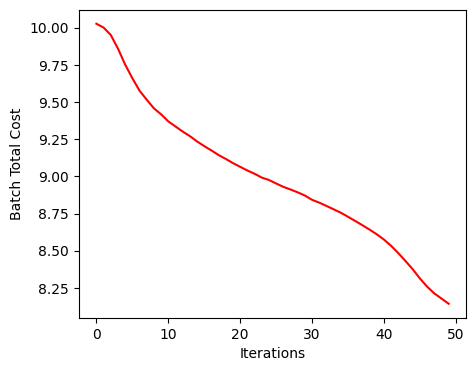

In [31]:
batch_size = 128
plt.figure(1,figsize=(5, 4))
plt.plot(range(int(len(losses))), [each/batch_size for each in losses], 'r')
plt.xlabel('Iterations')

# total loss
plt.ylabel('Batch Total Cost')
plt.show()